# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Next task: to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


# **Course 6 End-of-Course Project: Build a machine learning model**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps
<br/>


# **Build a machine learning model**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?

          The goal at this stage to create additional models using tre-based algorythms - Random Forest and XGBoost. This 
          models should predict wherether or not user will churn
2.   What are the ethical implications of the model? What are the consequences of your model making errors?

          In general there is no ethical questions in this case.
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?

          If model predicted False negative - Company will lose customer and potentially money
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?

          If model predicted False positive - One additional customer will be keep
3.  Do the benefits of such a model outweigh the potential problems?

          There is no big isuue with this problem, as Company won't ban user for not using its application
4.  Would you proceed with the request to build this model? Why or why not?

          We can proceed

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [29]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

Now read in the dataset as `df0` and inspect the first five rows.

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the first five rows
df0.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [5]:
# Copy the df0 dataframe
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [7]:
# 1. Create `km_per_driving_day` feature
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# 2. Get descriptive stats
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [9]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [10]:
# 1. Create `percent_sessions_in_last_month` feature
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

# 1. Get descriptive stats
df["percent_sessions_in_last_month"].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [11]:
# Create `professional_driver` feature
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)
df["professional_driver"].value_counts()

professional_driver
0    12405
1     2594
Name: count, dtype: int64

#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [12]:
# Create `total_sessions_per_day` feature
df["total_sessions_per_day"] = df["total_sessions"] / df["n_days_after_onboarding"]

As with other features, get descriptive statistics for this new feature.

In [13]:
# Get descriptive stats
df["total_sessions_per_day"].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [27]:
# Create `km_per_hour` feature
df["km_per_hour"] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df["km_per_hour"].describe()

count    14299.000000
mean       190.730963
std        339.926138
min         72.013095
25%         90.649402
50%        122.105845
75%        193.238449
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [15]:
# Create `km_per_drive` feature
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]
df["km_per_drive"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [16]:
# 1. Convert infinite values to zero
df.loc[:, "km_per_drive"] = df["km_per_drive"].map(lambda x: 0 if x == np.inf else x)

# 2. Confirm that it worked
df["km_per_drive"].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [17]:
# Create `percent_of_sessions_to_favorite` feature
df["percent_of_sessions_to_favorite"] = (df["total_navigations_fav1"] + df["total_navigations_fav2"]) / df["total_sessions"]

# Get descriptive stats
df["percent_of_sessions_to_favorite"].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

### **Task 3. Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [18]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)
df.isna().sum()

ID                                 0
label                              0
sessions                           0
drives                             0
total_sessions                     0
n_days_after_onboarding            0
total_navigations_fav1             0
total_navigations_fav2             0
driven_km_drives                   0
duration_minutes_drives            0
activity_days                      0
driving_days                       0
device                             0
km_per_driving_day                 0
percent_sessions_in_last_month     0
professional_driver                0
total_sessions_per_day             0
km_per_hour                        0
km_per_drive                       0
percent_of_sessions_to_favorite    0
dtype: int64

### **Task 4. Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Task 5. Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [21]:
# Create new `device2` variable
df["device2"] = df["device"].map(lambda x: 0 if x == "Android" else 1)
df["device2"].unique()

array([0, 1], dtype=int64)

#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [22]:
# Create binary `label2` column
df["label2"] = df["label"].map(lambda x: 1 if x == "churned" else 0)
df["label2"].value_counts()

label2
0    11763
1     2536
Name: count, dtype: int64

### **Task 6. Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [24]:
# Drop `ID` column
df.drop(["ID"], axis=1, inplace=True)

### **Task 7. Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [26]:
# Get class balance of 'label' col
df["label"].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Task 9. Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [28]:
df.dtypes

label                               object
sessions                             int64
drives                               int64
total_sessions                     float64
n_days_after_onboarding              int64
total_navigations_fav1               int64
total_navigations_fav2               int64
driven_km_drives                   float64
duration_minutes_drives            float64
activity_days                        int64
driving_days                         int64
device                              object
km_per_driving_day                 float64
percent_sessions_in_last_month     float64
professional_driver                  int32
total_sessions_per_day             float64
km_per_hour                        float64
km_per_drive                       float64
percent_of_sessions_to_favorite    float64
device2                              int64
label2                               int64
dtype: object

In [33]:
# 1. Isolate X variables
X = df.drop(["label", "label2", "device"], axis=1)

# 2. Isolate y variable
y = df["label2"]

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42)

# 5 Predefined split:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

Verify the number of samples in the partitioned data.

In [34]:
print(f"Train set size: {(X_tr.shape[0] / X.shape[0])*100:.1f}%")
print(f"Validation set size: {(X_val.shape[0] / X.shape[0])*100:.1f}%")
print(f"Test set size: {(X_test.shape[0] / X.shape[0])*100:.1f}%")

Train set size: 60.0%
Validation set size: 20.0%
Test set size: 20.0%


This aligns with expectations.

### **Task 10. Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>



In [35]:
X.dtypes

sessions                             int64
drives                               int64
total_sessions                     float64
n_days_after_onboarding              int64
total_navigations_fav1               int64
total_navigations_fav2               int64
driven_km_drives                   float64
duration_minutes_drives            float64
activity_days                        int64
driving_days                         int64
km_per_driving_day                 float64
percent_sessions_in_last_month     float64
professional_driver                  int32
total_sessions_per_day             float64
km_per_hour                        float64
km_per_drive                       float64
percent_of_sessions_to_favorite    float64
device2                              int64
dtype: object

In [54]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

cv_params = {"max_depth" : [2,5,10,50],
             "max_features" : [0.3, 0.4, 0.8],
             "min_samples_split" : [0.001, 0.01, 0.05, 0.3],
             "n_estimators" : [75, 100, 125, 150]}

# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, n_jobs=-1, refit="recall")

Now fit the model to the training data.

In [55]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50],
                         'max_features': [0.3, 0.4, 0.8],
                         'min_samples_split': [0.001, 0.01, 0.05, 0.3],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Examine the best average score across all the validation folds.

In [56]:
# Examine best score
rf1.best_score_

0.1301775147928994

Examine the best combination of hyperparameters.

In [57]:
# Examine best hyperparameter combo
rf1.best_params_

{'max_depth': 50,
 'max_features': 0.4,
 'min_samples_split': 0.001,
 'n_estimators': 75}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [47]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    actual_metrics = {"accuracy" : "mean_test_accuracy",
                      "precision":"mean_test_precision",
                      "recall":"mean_test_recall",
                      "f1" : "mean_test_f1"}
    
    # Get all the results from the CV and put them in a df
    all_result = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_metrics = all_result.iloc[all_result[actual_metrics[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    # Create table of results
    table = pd.DataFrame({"Model_name" : [model_name],
                       "Accuracy" : [best_metrics[actual_metrics["accuracy"]]],
                       "Precision" : [best_metrics[actual_metrics["precision"]]],
                       "Recall" : [best_metrics[actual_metrics["recall"]]],
                       "F1_score" : [best_metrics[actual_metrics["f1"]]]})

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [93]:
result = make_results("Random Forest tuned", rf1, "recall")
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest tuned,0.815734,0.434211,0.130178,0.200303


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [59]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" :[2,5,10,50],
             "min_child_weight" : [0.1, 0.3, 0.5],
             "learning_rate" : [0.01, 0.3, 0.5],
             "n_estimators" : [50, 75, 100, 125, 150]}

# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=custom_split, n_jobs=-1, refit="recall")

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [60]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.3, 0.5],
                         'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [0.1, 0.3, 0.5],
                         'n_estimators': [50, 75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [63]:
# Examine best score
xgb1.best_score_

0.22090729783037474

And the best parameters.

In [64]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.5,
 'max_depth': 5,
 'min_child_weight': 0.5,
 'n_estimators': 100}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [94]:
# Call 'make_results()' on the GridSearch object
result_2 = make_results("XGBoos tuned", xgb1, "recall")
result = pd.concat([result, result_2], axis=0).reset_index(drop=True)
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest tuned,0.815734,0.434211,0.130178,0.200303
1,XGBoos tuned,0.808042,0.421053,0.220907,0.289780


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Task 11. Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [95]:
# Use random forest model to predict on validation data
y_val_pred = rf1.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [72]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model_name': [model_name],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1_score': [f1],
                          })

    return table

In [96]:
# Get validation scores for RF model
rf_result_val = get_test_scores("Random Forest tuned - val data", y_val_pred, y_val)
# Append to the results table
result = pd.concat([result, rf_result_val], axis=0).reset_index(drop=True)
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest tuned,0.815734,0.434211,0.130178,0.200303
1,XGBoos tuned,0.808042,0.421053,0.220907,0.289780
2,Random Forest tuned - val data,0.940559,0.997050,0.666667,0.799054


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [97]:
# Use XGBoost model to predict on validation data
y_val_pred_1 = xgb1.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_result_val = get_test_scores("XGBoos tuned - val data", y_val_pred_1, y_val)

# Append to the results table
result = pd.concat([result, xgb_result_val], axis=0).reset_index(drop=True)
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest tuned,0.815734,0.434211,0.130178,0.200303
1,XGBoos tuned,0.808042,0.421053,0.220907,0.289780
2,Random Forest tuned - val data,0.940559,0.997050,0.666667,0.799054
3,XGBoos tuned - val data,0.961888,0.990148,0.792899,0.880613


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 12. Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [98]:
# Use XGBoost model to predict on test data
y_test_pred = xgb1.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
final_score = get_test_scores("XGBoost - test data", y_test_pred, y_test)

# Append to the results table
result = pd.concat([result, final_score], axis=0).reset_index(drop=True)
result

,Model_name,Accuracy,Precision,Recall,F1_score
0,Random Forest tuned,0.815734,0.434211,0.130178,0.200303
1,XGBoos tuned,0.808042,0.421053,0.220907,0.289780
2,Random Forest tuned - val data,0.940559,0.997050,0.666667,0.799054
3,XGBoos tuned - val data,0.961888,0.990148,0.792899,0.880613
4,XGBoost - test data,0.804196,0.390041,0.185404,0.251337


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Task 13. Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

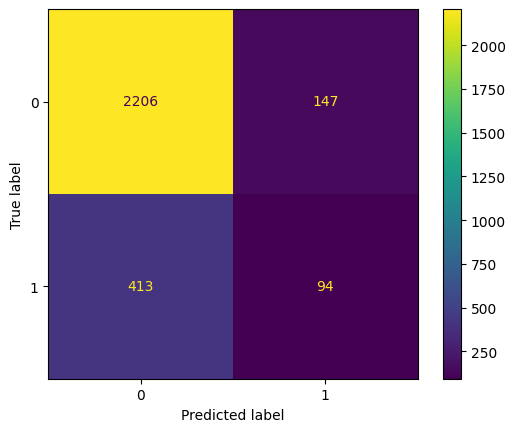

In [103]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb1.best_estimator_.classes_)
dist.plot();

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Task 14. Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

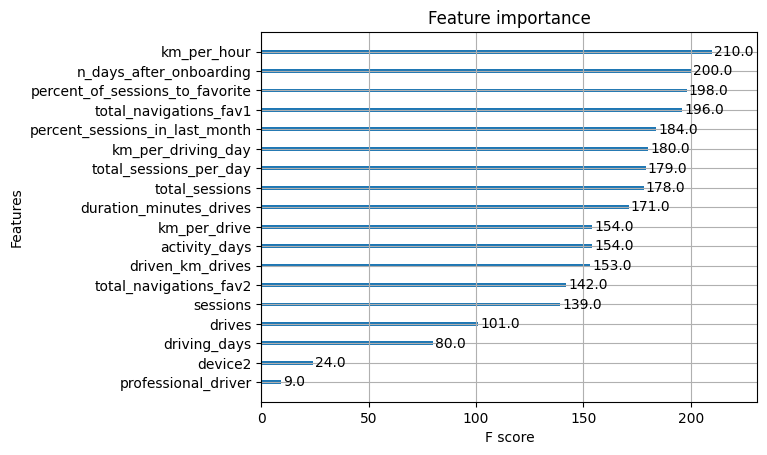

In [104]:
plot_importance(xgb1.best_estimator_);

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

        We do not recommend to use this model for production, although it can be use as a baseline for future investigation     
        and improving model performance

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

        Splitting data for three parts (train, validation, test) leave less data for model training although it allow to see    
        how model will be performing on absolutely new data as test data won't' be a part of any training and   
        avaluation check

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

        Logistic regression models are easier to interpret. The values of coefficient clearly show which correlation    
        (positive or negative) have independent variables with dependent variable

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

        Tree-based model ensembles are often better predictors. This models make less assumptions and made less requirement for data preprocessing. Feature importance make it easier to understand the prediction although it is not so evident as with Logistic Regression case

5. What could you do to improve this model?

        The model performance leave much to be desired so there are definitely lot of place for improvement. New features could be engineered to try to generate better predictive signal and to improve models performance We can also continue GreadSearch in order to find better values for hyperparameters

6. What additional features would you like to have to help improve the model?

        It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.)